In [1]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Set path to root directory
path = Path('/content/drive/My Drive/covid_data')


In [5]:
path.ls()

[PosixPath('/content/drive/My Drive/covid_data/images')]

In [6]:

bs = 16

In [7]:
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/drive/My Drive/covid_data/images/normal_3620.png'),
 PosixPath('/content/drive/My Drive/covid_data/images/normal_3590.png'),
 PosixPath('/content/drive/My Drive/covid_data/images/normal_3585.png'),
 PosixPath('/content/drive/My Drive/covid_data/images/normal_3601.png'),
 PosixPath('/content/drive/My Drive/covid_data/images/normal_3587.png')]

In [9]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.png$'

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


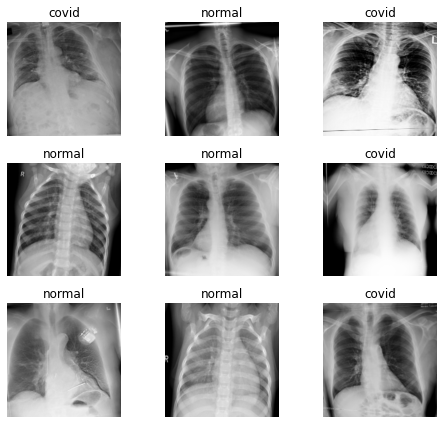

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes),data.c

['covid', 'normal']


(2, 2)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.451877,0.323352,0.140659,17:22
1,0.296572,0.163542,0.064469,01:05
2,0.205396,0.130555,0.054212,01:06
3,0.194917,0.121230,0.043956,01:05


In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

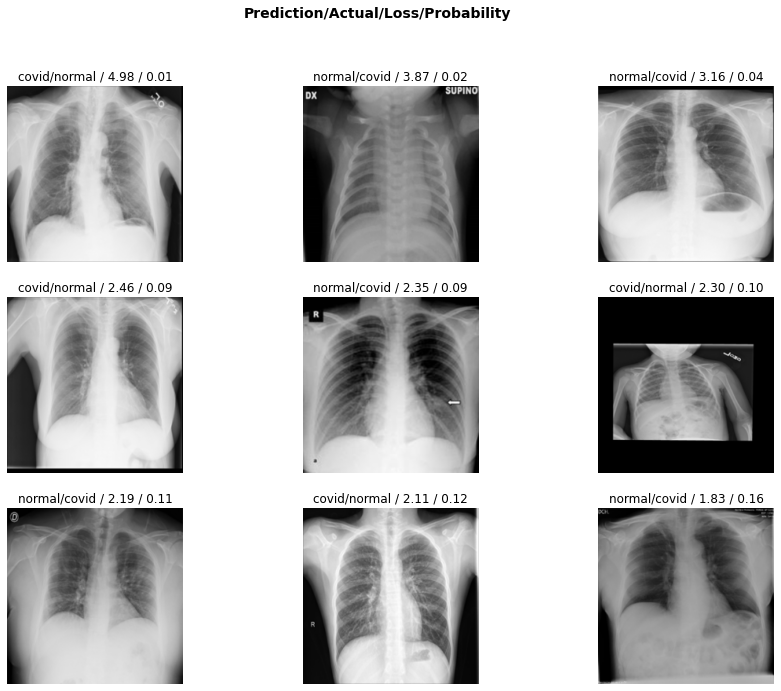

In [ ]:

interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


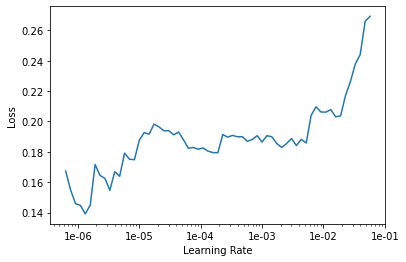

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.159462,0.102286,0.035897,01:04
1,0.173385,0.102566,0.035897,01:06
2,0.169177,0.101784,0.038095,01:05
3,0.191996,0.099828,0.035165,01:04


In [11]:
learn_1 = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [12]:
learn_1.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


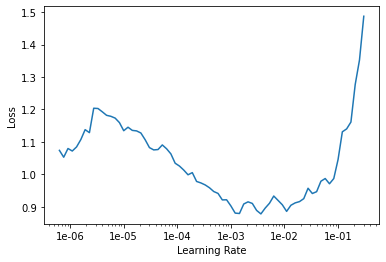

In [13]:
learn_1.recorder.plot()

In [14]:
learn_1.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.431012,0.213049,0.084982,12:07
1,0.238907,0.129829,0.048352,01:06
2,0.194739,0.104832,0.036630,01:05
3,0.175780,0.092730,0.034432,01:05


Conclusion:
* The dataset contains close to 7000 images of two classes, covid and non covid.

* Covid can be recognized using Ground glass opacity which is a hazy region in lungs, even though the diffrences are minute resnet50 performs really well and provides and accuracy close to 96.56

* Image enhancement techniques that highlight the grey areas of X-ray will enable further improvements in the model.

* Using a high learning rate has helped in dealing with the problem of overfitting. 